In [47]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
#from spellchecker import SpellChecker
import matplotlib.pyplot as plt
from collections import Counter #uso para n-gramas
#from wordcloud import WordCloud
import re # talvez regex vai ajudar na normalizaçao

Aqui pretendo verificar a frequência das palavras (devo retirar stopwords) para fazer um heatmap.
Desafio extra: subir o texto de insumo, fazer o mesmo pré-processamento e exibir somente heywords que não aparecem no texto de insumo.

In [48]:
csv_file_path = 'C:/Users/Administrator/Documents/repos/mestrado/visual_analytics/corpus_completo.csv'

# Lendo o csv como um df
df = pd.read_csv(csv_file_path)

#Criando uma cópia
df_va = df.copy()

In [49]:
df_va.groupby('nota').count()

,file_name,content
nota,,
0,25,25
1,211,211
2,628,628
3,715,715
4,477,477
5,237,237


In [50]:
nltk.download('stopwords')
nltk.download('punkt') # é um tokenizador, importante para nltk.word_tokenize
# nltk.download('rslp') é um stemmer. acho q nao vou usar
nltk.download('punkt_tab') # Precisei que devia fazer download desse pacote pq o punkt nao tava funcionando

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [51]:
# Pré-processamento

# Devo tirar acentos?? Ex: Belém
# Retirar números? Na duvida, retirei.
# Não fiz stemming visto que poderia perder erros ortográficos

#Retirada de sinais gráficos, pontuações e espaços
def clean_cp(text):
    cleaned = text.lower() #Deixando tudo minúsculo
    cleaned = re.sub('[^\w\s]', '', cleaned) # Removendo pontuacao
    #cleaned = re.sub('[0-9]+', '', cleaned) # Removendo números 
    cleaned = re.sub('\d+', '', cleaned) # Removendo números NÃO TÁ FUNCIONANDO AAAAAAAAAAAAAAAAA Começou a funcionar qdo pus o lower como primeiro comando da funçao
    cleaned = re.sub('\s+', ' ', cleaned) # Removendo espaços extras
    cleaned = re.sub('\s+', ' ', cleaned)
    return cleaned.strip() # Removendo tabs

#Retirada de stopwords.. Essa parte deve ser importante na hora de ver as palavras mais frequentes (heatmap)
#def stopwords_cp(text):
  #  stopwords = nltk.corpus.stopwords.words('portuguese')
   # tokenized = nltk.word_tokenize(text, language='portuguese')
   # sem_stopwords = [token for token in tokenized if token not in stopwords]
   # return ' '.join(sem_stopwords)

df_va['content'] = df_va['content'].apply(clean_cp)
#df_va['content'] = df_va['content'].apply(stopwords_cp)

In [52]:
df_va['content'].sample(5)

1051    são carlos sp de outubro de prefeitura municip...
915     belém de outubro de prezado prefeito municipal...
2001    prezado excelentíssimo senhor prefeito nossa c...
2185    carta aberta bibiana cambará ciudadana de bele...
697     carta aberta aos cuidados do prefeito municipa...
Name: content, dtype: object

In [53]:
# Tokenizando e retirando stopwords: importante para ver a frequencia das palavras

def tokenized_cp(text):
   stopwords = nltk.corpus.stopwords.words('portuguese') # Carregando as stopwords do português
   tokenized = nltk.word_tokenize(text, language='portuguese') #Transforma o texto em tokens
   text_sem_stopwords = [token for token in tokenized if token not in stopwords] # Deixando somente o que nao é stopword no texto
   return text_sem_stopwords

df_va['tokenized_content'] = df_va['content'].apply(tokenized_cp)

In [54]:
df_va['tokenized_content'].sample(5)

344     [foz, iguacu, carta, aberta, moradores, belem,...
1282    [salvador, bahia, outubro, prefeitura, municip...
727     [prefeitura, municipal, bibiana, cambará, quit...
2160    [assunto, patrimônio, histórico, cidade, belém...
2194    [carta, aberta, á, atenção, prefeitura, munici...
Name: tokenized_content, dtype: object

In [55]:
df_va.dtypes

file_name            object
content              object
nota                  int64
tokenized_content    object
dtype: object

In [56]:
# Contando o número de tokens SEM STOPWORDS (diferente do typestokenttr.ipynb) para cada texto: usarei isso para o gráfico 2, que demonstra o número mínimo e número máximo de tokens

# Contando tokens sem considerar a nota
df_va['num_tokens'] = df_va['tokenized_content'].apply(len)

# Agrupando de acordo com cada nota
qtde_tokens_nota = df_va.groupby('nota')['num_tokens'].sum()

In [57]:
df_va.tail()

,file_name,content,nota,tokenized_content,num_tokens
2288,20152t4p936n5r.docx,belem de outubro de senhores prefeitura munici...,5,"[belem, outubro, senhores, prefeitura, municip...",100
2289,20152t4p93r.docx,pará de outubro de ao senhor prefeito municipa...,5,"[pará, outubro, senhor, prefeito, municipal, p...",107
2290,20152t4p953n5r.docx,pilas de outubro de prefeitura municipal de be...,5,"[pilas, outubro, prefeitura, municipal, belém,...",94
2291,20152t4p96r.docx,para a prefeitura municipal de um morador de b...,5,"[prefeitura, municipal, morador, belém, senhor...",99
2292,20152t4p997n5r.docx,cidade do belém dia de outubro de exelentíssim...,5,"[cidade, belém, dia, outubro, exelentíssima, p...",145


In [58]:
# Verificando a ocorrência dos tokens

# Criando uma lista só com todos os tokens (?)
all_tokens = [token for tokens in df_va['tokenized_content'] for token in tokens]

# Contando a ocorrencia de cada token
token_counts = Counter(all_tokens)
token_counts

# Convertendo para um df para ficar melhor de visualizar
# token_counts_df = pd.DataFrame(token_counts.items(), columns=['token', 'count']).sort_values(by='count', ascending=False)

Counter({'azulejos': 8132,
         'cidade': 5561,
         'belém': 4062,
         'casarões': 4001,
         'prefeitura': 2903,
         'situação': 2385,
         'municipal': 2249,
         'roubos': 2057,
         'bibiana': 1780,
         'patrimônio': 1725,
         'vandalismo': 1694,
         'cambará': 1646,
         'medidas': 1578,
         'históricos': 1261,
         'proteção': 1239,
         'xix': 1227,
         'maior': 1226,
         'palacete': 1178,
         'problema': 1117,
         'parte': 1093,
         'variedade': 1064,
         'alvo': 1049,
         'século': 1047,
         'valor': 1031,
         'desde': 1023,
         'maria': 1013,
         'mercado': 997,
         'histórico': 990,
         'cultural': 988,
         'valiosos': 957,
         'morador': 947,
         'ano': 931,
         'ter': 902,
         'silva': 888,
         'vitor': 882,
         'atenciosamente': 859,
         'carta': 859,
         'cidades': 851,
         'porque': 847,
   

In [60]:
# Agrupando a contagem de tokens de acordo com cada nota
nota_token_counts = (
    df_va.groupby('nota')['tokenized_content']
    .apply(lambda texts: Counter([token for text in texts for token in text]))
)

# Convertendo cada token e contagem em um dataframe
df_frequency = nota_token_counts.reset_index()
df_frequency.columns = ['nota', 'token', 'token_frequency']
sorted_tokens = df_frequency.sort_values('token_frequency', ascending=False)
sorted_tokens

,nota,token,token_frequency
44443,3,azulejos,2531.0
29648,2,azulejos,2173.0
44465,3,cidade,1838.0
59238,4,azulejos,1810.0
29670,2,cidade,1383.0
...,...,...,...
87640,5,vendeuse,NaN
87642,5,comunico,NaN
87644,5,roubáos,NaN
87645,5,impeder,NaN


In [61]:
# Agrupando a contagem de tokens por nota de forma a mostrar os 15 mais comuns para cada nota ( 15 * 6 = 90 linhas portanto )

top_tokens_per_grade = (
    sorted_tokens.groupby('nota')
    .head(15)  # Select the top 15 tokens per grade
    .reset_index(drop=True)
)
top_tokens_per_grade

,nota,token,token_frequency
0,3,azulejos,2531.0
1,2,azulejos,2173.0
2,3,cidade,1838.0
3,4,azulejos,1810.0
4,2,cidade,1383.0
...,...,...,...
85,0,europa,9.0
86,0,porque,9.0
87,0,então,8.0
88,0,século,8.0


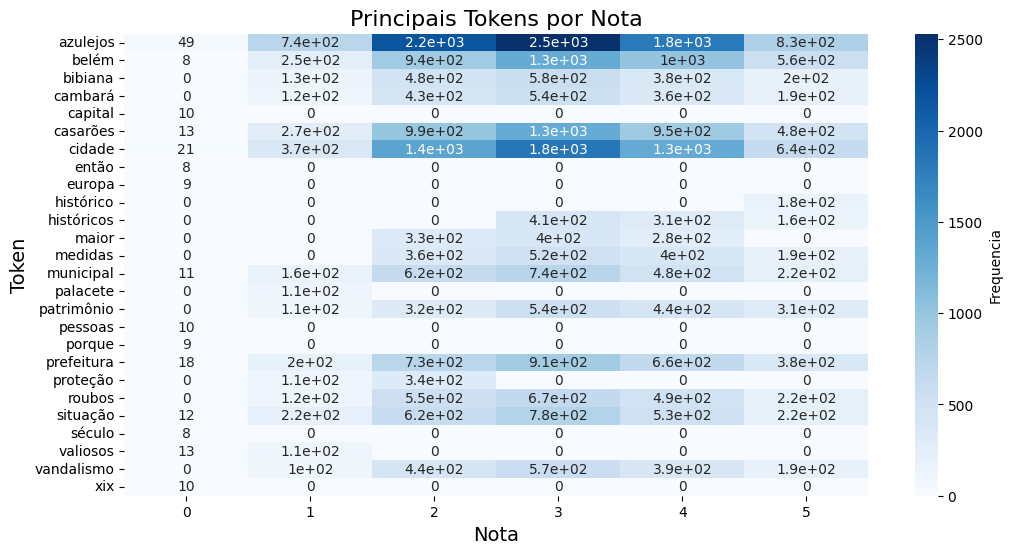

In [62]:
# Rearranjando dados para criação do heatmap
heatmap_data = top_tokens_per_grade.pivot(index='token', columns='nota', values='token_frequency').fillna(0)

# Criando o heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="Blues",
    cbar_kws={'label': 'Frequencia'}   
)

plt.title("Principais Tokens por Nota", fontsize=16)
plt.xlabel("Nota", fontsize=14)
plt.ylabel("Token", fontsize=14)
plt.show()